<a href="https://colab.research.google.com/github/nnioax/MATH-540-Final-Project/blob/main/math540_finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empirical Verification of the Error Bound of Decision Tree Classifier

Student name: Zhamila Kulchukova

**Algorithm**

Desicion Tree Classifier is a type of learning algorithm that predicts the label of a sample by performing simple boolean operations. 

This notebook contains the source code for the MATH 450 final project report. The theoretical error bound that is being considered is:
$$L_{\mathcal{D}}(h) \leq L_S(h) + \sqrt{\frac{(n+1)log_2(d+3)+log(2/\delta)}{2m}},$$
where $L_{\mathcal{D}}(h)$ is the true error, $L_S(h)$ - empirical loss, $n$ - number of leaf nodes in the constructed tree, $d$ - depth of the tree, $m$ - number of samples and $\delta$ - confidence parameter.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, tree, model_selection, preprocessing

In [ ]:
# defining the error bound function

def error_bound(nodes, depth, m, cp) :
  return np.sqrt((nodes + 1) * np.log2(depth + 3) + np.log(2/cp))/np.sqrt(2 * m)

In [ ]:
# verifying that the experimental error decays as the sample size increases

m = 3000 # number of samples
k = 4  # number of features

# generating the training data as described in the theory
# the features of x are binary (1 or 0)
# y is binary (1 or 0)
mx = [np.random.randint(2, size = k) for i in range(m)]
my = np.random.randint(2, size = m)

# splitting the data into training set and testing set
mx_train, mx_test, my_train, my_test = model_selection.train_test_split(mx, my, test_size = 0.3, random_state = 42)
err_sample = []
bound_sample = []
nm = []

# fixing the depth d
d = 3

dtc_m = tree.DecisionTreeClassifier(max_leaf_nodes = 2**d, max_depth = d)

j = 0
for j in range(m):
  x_temp_train = mx_train[0:(j+1)]
  y_temp_train = my_train[0:(j+1)]
  x_temp_test = mx_test[0:(j+1)]
  y_temp_test = my_test[0:(j+1)]

  dtc_m.fit(x_temp_train, y_temp_train)

  nm.append(j+1)

  # experimental error
  err_sample.append(dtc_m.score(x_temp_train, y_temp_train) - dtc_m.score(x_temp_test, y_temp_test))
  # error bound
  bound_sample.append(error_bound(2**d, d, nm[j], 0.1))

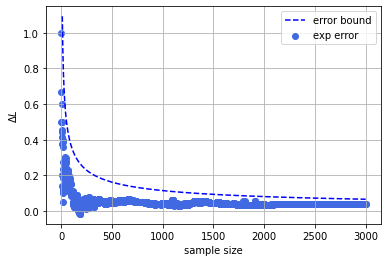

In [ ]:
# plotting both the experimental error and the error bound
plt.scatter(nm, err_sample, c = 'royalblue', label = "exp error")  
plt.plot(nm[10:], bound_sample[10:], c = 'b', linestyle = 'dashed', label = "error bound")
plt.xlabel("sample size")
plt.ylabel("$\Delta L$")
plt.legend()
plt.grid()

In [ ]:
# verifying that the experimental error increases as the depth of the tree increases

m = 10000 # number of samples
k = 500 # number of features

# generating the training data as described in the theory
# the features of x are binary (1 or 0)
# y is binary (1 or 0)
dx = [np.random.randint(2, size = k) for i in range(m)]
dy = np.random.randint(2, size = m)

# splitting the data into training set and testing set
dx_train, dx_test, dy_train, dy_test = model_selection.train_test_split(dx, dy, test_size = 0.3, random_state = 42)
err_depth = []
bound_depth = []
nd = []

# the maximum depth to which the algorithm has converged using the said data
depthmax = 10

for j in range(depthmax):

  dtc_d = tree.DecisionTreeClassifier(max_leaf_nodes = 2**(j+1), max_depth = j+1)
  dtc_d.fit(dx_train, dy_train)

  nd.append(dtc_d.get_depth())

  # experimental error
  err_depth.append(dtc_d.score(dx_train, dy_train) - dtc_d.score(dx_test, dy_test))
  # error bound
  bound_depth.append(error_bound(2**nd[j], nd[j], len(dy_train), 0.1))

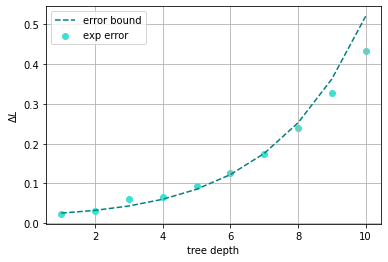

In [ ]:
# plotting both the experimental error and the error bound
plt.scatter(nd, err_depth, c = 'turquoise', label = "exp error")  
plt.plot(nd, bound_depth, c = 'teal', linestyle = 'dashed', label = "error bound")
plt.xlabel("tree depth")
plt.ylabel("$\Delta L$")
plt.legend()
plt.grid()

In [ ]:
# testing on the real world data

# DISCLAIMER: the error bound is for the data with binary features,
# but the breast cancer dataset only has binary targets,
# the features are some real numbers 

# to fix that, the data set is converted into binary
# by setting feature values that are larger than the average of the
# feature set to 1, and 0 if less

# this is not ideal, but it is made to be consistent with the
# error bound assumptions

bc = datasets.load_breast_cancer()

bc.data_norm = []

for i in range(len(bc.data)):
  data_temp = np.zeros(len(bc.data[i]))
  for j in range(len(bc.data[i])):
    if bc.data[i,j] > np.average(bc.data[:,j]):
      data_temp[j] = 1
  bc.data_norm.append(data_temp) 

bc.data_train, bc.data_test, bc.target_train, bc.target_test = model_selection.train_test_split(bc.data_norm, bc.target, test_size = 0.3, random_state = 42)

In [ ]:
# checking if the experimental error decays as in theory for changing m

err_bc_sample = []
bc_bound_sample = []
bc_nm = []

d = 3

dtc_bc = tree.DecisionTreeClassifier(max_leaf_nodes = 2**d, max_depth = d)

j = 0
for j in range(len(bc.target)):
  bc.data_traintemp = bc.data_train[0:(j+1)]
  bc.target_traintemp = bc.target_train[0:(j+1)]
  bc.data_testtemp = bc.data_test[0:(j+1)]
  bc.target_testtemp = bc.target_test[0:(j+1)]

  dtc_bc.fit(bc.data_traintemp, bc.target_traintemp)

  bc_nm.append(j+1)

  # experimental error
  err_bc_sample.append(dtc_bc.score(bc.data_traintemp, bc.target_traintemp) - dtc_bc.score(bc.data_testtemp, bc.target_testtemp))
  # error bound
  bc_bound_sample.append(error_bound(2**d, d, bc_nm[j], 0.1))

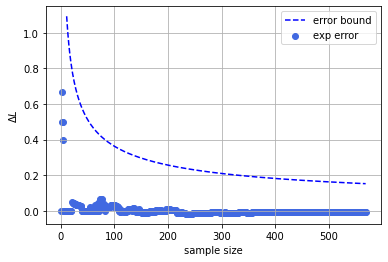

In [ ]:
# plotting both experimental error and the error bound
# as expected, the error behaves differently
plt.scatter(bc_nm, err_bc_sample, c = 'royalblue', label = "exp error")  
plt.plot(bc_nm[10:], bc_bound_sample[10:], c = 'b', linestyle = 'dashed', label = "error bound")
plt.xlabel("sample size")
plt.ylabel("$\Delta L}$")
plt.legend()
plt.grid()

In [ ]:
# checking if the experimental error decays as in theory for changin d

err_bc_depth = []
bound_bc_depth = []
bc_nd = []

depthmax = 7

for j in range(depthmax):

  dtc_bc = tree.DecisionTreeClassifier(max_leaf_nodes = 2**(j+1), max_depth = j+1)

  dtc_bc.fit(bc.data_train, bc.target_train)

  bc_nd.append(dtc_bc.get_depth())

  # experimental error
  err_bc_depth.append(dtc_bc.score(bc.data_train, bc.target_train) - dtc_bc.score(bc.data_test, bc.target_test))
  # error bound
  bound_bc_depth.append(error_bound(2**bc_nd[j], bc_nd[j], len(bc.target_train), 0.1))

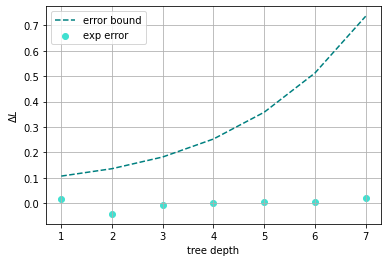

In [ ]:
# plotting both experimental error and the error bound
# as expected, the error behaves differently
plt.scatter(bc_nd, err_bc_depth, c = 'turquoise', label = "exp error")  
plt.plot(bc_nd, bound_bc_depth, c = 'teal', linestyle = 'dashed', label = "error bound")
plt.xlabel("tree depth")
plt.ylabel("$\Delta L$")
plt.legend()
plt.grid()